In [1]:
import pandas as pd
from datetime import datetime,date
import matplotlib.pyplot as plt
import seaborn as sns
import requests, json
import matplotlib.dates as mdates
import numpy as np

#pd.__version__

## Import the latest data 

The data is imported from the covidtracking.com website. 

The column Deaths per Positive case (DperP) is added. 

In [2]:
url = 'https://covidtracking.com/api/v1/states/daily.json'

r = requests.get(url)

json_data = r.json()

df = pd.json_normalize(json_data)
df['DperP'] = df['death']/df['positive']
df['PosPerTest']= df['positiveIncrease']/df['totalTestResultsIncrease']
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,DperP,PosPerTest
0,2020-05-08,AK,377.0,25096.0,NaN,16.0,NaN,NaN,NaN,NaN,...,25473,25473,02,0.0,0.0,1129.0,3.0,1132.0,0.026525,0.002650
1,2020-05-08,AL,9221.0,110893.0,NaN,NaN,1207.0,NaN,454.0,NaN,...,120114,120114,01,26.0,29.0,4618.0,323.0,4941.0,0.040668,0.065371
2,2020-05-08,AR,3694.0,60300.0,NaN,70.0,466.0,NaN,NaN,14.0,...,63994,63994,05,1.0,4.0,3916.0,83.0,3999.0,0.023822,0.020755
3,2020-05-08,AS,0.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,...,83,83,60,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,2020-05-08,AZ,10526.0,109381.0,NaN,730.0,1482.0,295.0,NaN,197.0,...,119907,119907,04,67.0,33.0,8240.0,581.0,8821.0,0.049116,0.065866


## Subset the data for specific states 
### First we look at Utah, where I live then we compare it to NY

In [3]:
UT = df[df['state']=='UT']

#UT.head()

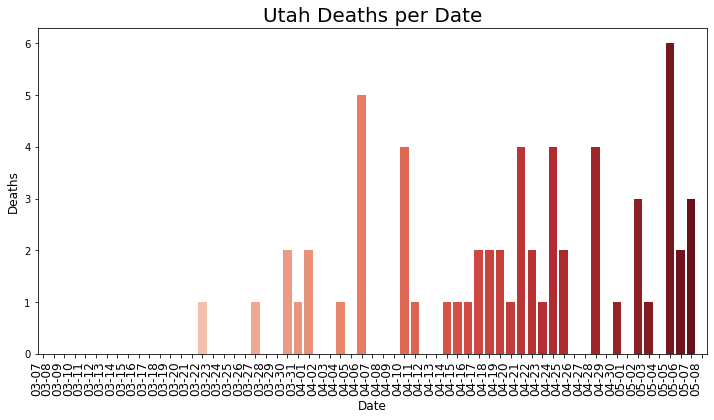

In [4]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'deathIncrease', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Deaths per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Deaths', fontdict={'fontsize':12})

#plt.savefig('Utah Deaths per Date.png')

plt.show()



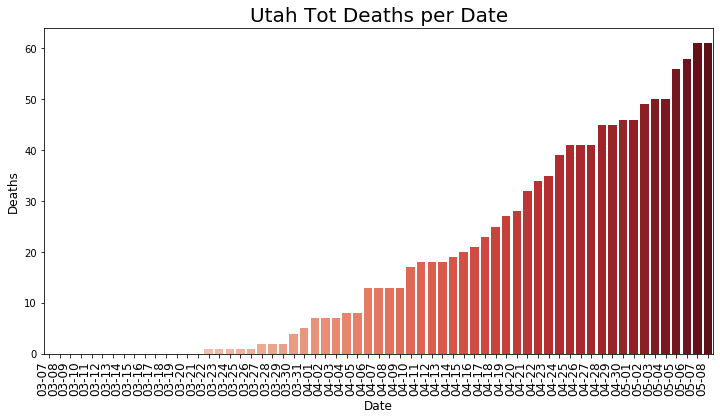

In [5]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'death', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Tot Deaths per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Deaths', fontdict={'fontsize':12})

#plt.savefig('Utah Tot Deaths per Date.png')

plt.show()

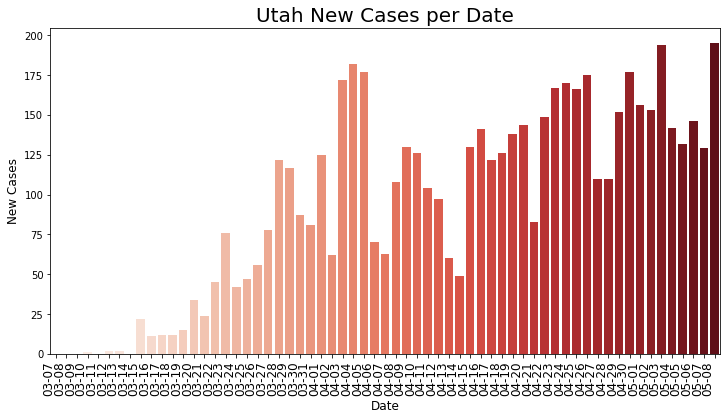

In [6]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positiveIncrease', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah New Cases per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('New Cases', fontdict={'fontsize':12})

#plt.savefig('Utah New Cases per Date.png')
plt.show()

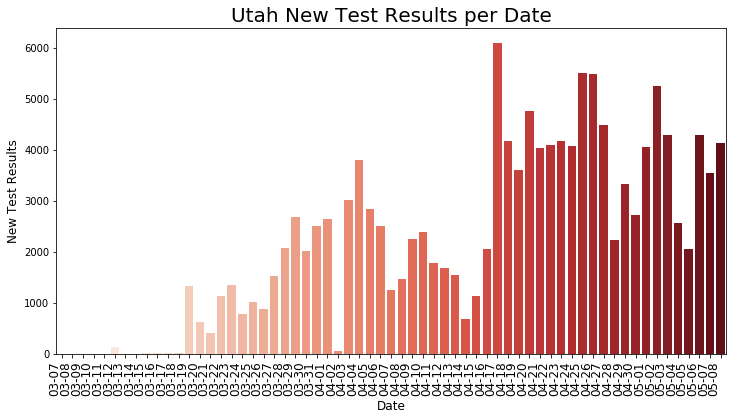

In [7]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'totalTestResultsIncrease', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah New Test Results per Date', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('New Test Results', fontdict={'fontsize':12})

#plt.savefig('Utah New Test Results per Date.png')
plt.show()

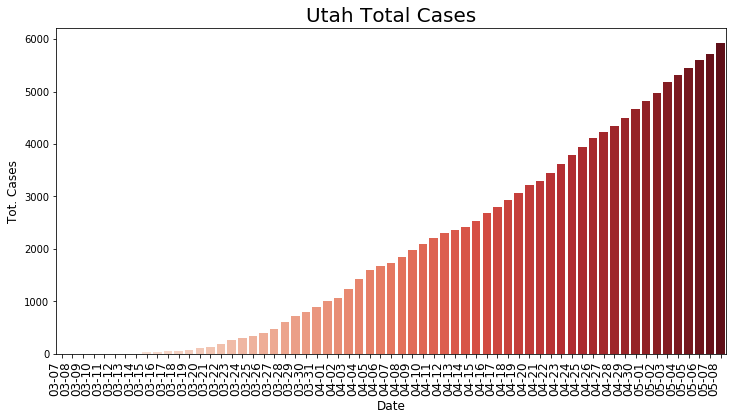

In [8]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positive', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Total Cases', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})

#plt.savefig('Utah Total Cases.png')
plt.show()

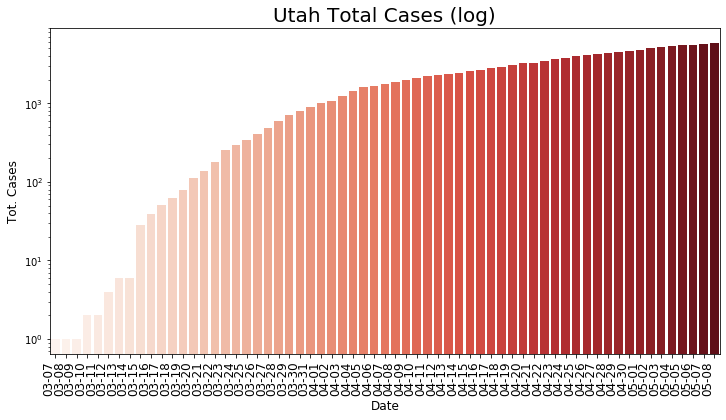

In [9]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = 'date', y = 'positive', data = UT, palette = 'Reds')

x_dates = UT['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Utah Total Cases (log)', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})
ax.set( yscale='log')

#plt.savefig('Utah Total Cases (log).png')
plt.show()

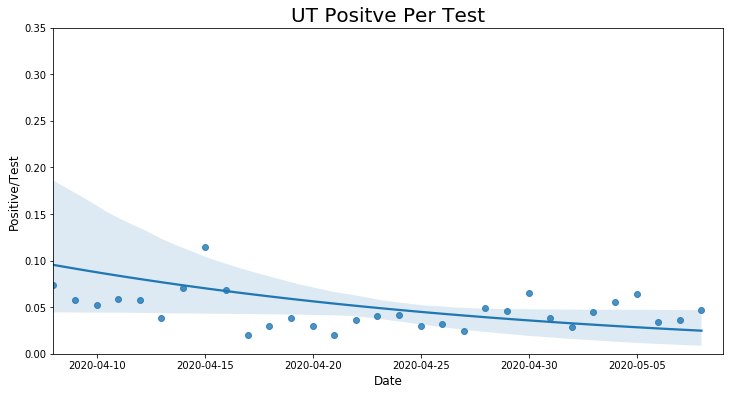

In [10]:
UT=UT[UT['date']>= '2020-03-29']
UT['date_ordinal'] = pd.to_datetime(UT['date']).apply(lambda date: date.toordinal())


fig, ax = plt.subplots(figsize = (12,6)) 


fig = sns.regplot(x = 'date_ordinal', y = 'PosPerTest', data = UT,logistic=True)
ax.set_xlim(UT['date_ordinal'].min() +10, UT['date_ordinal'].max() + 1)
ax.set_ylim(0,0.35)
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
plt.title('UT Positve Per Test', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Positive/Test', fontdict={'fontsize':12})
ax.set_xticklabels(new_labels)

#plt.savefig('PosPerTest.png')
plt.show()

## Compare stats with Nearest States and States with Similar Case Counts: 

In [11]:
#create more subsetes of data for each state of interest
ID = df[df['state']=='ID']
NM = df[df['state']=='NM']
CO = df[df['state']=='CO']
AZ = df[df['state']=='AZ']

In [12]:
FourC = UT.append(ID).append(CO).append(AZ).append(NM).append(df[df['state']=='NV']).append(df[df['state']=='WY'])

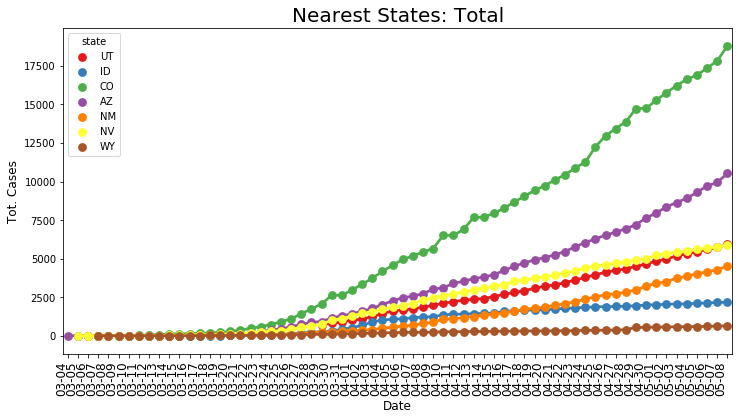

In [13]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'positive',hue='state', data = FourC, palette = 'Set1')

x_dates = FourC['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Nearest States: Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})

#plt.savefig('Four Corners Total Cases.png')
plt.show()

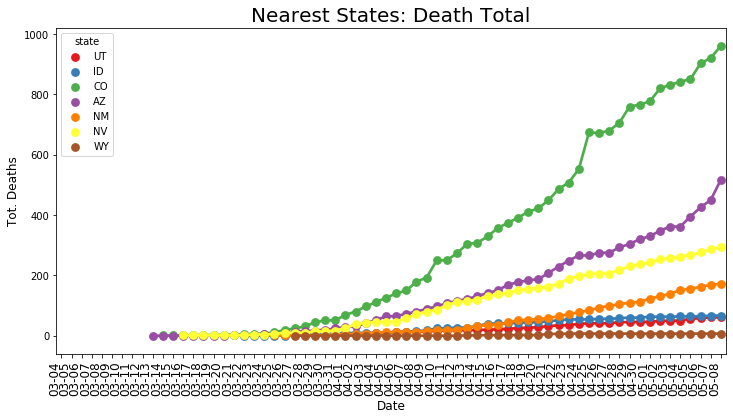

In [14]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'death',hue='state', data = FourC, palette = 'Set1')

x_dates = FourC['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Nearest States: Death Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Deaths', fontdict={'fontsize':12})

#plt.savefig('4C Daily Death Total.png')
plt.show()

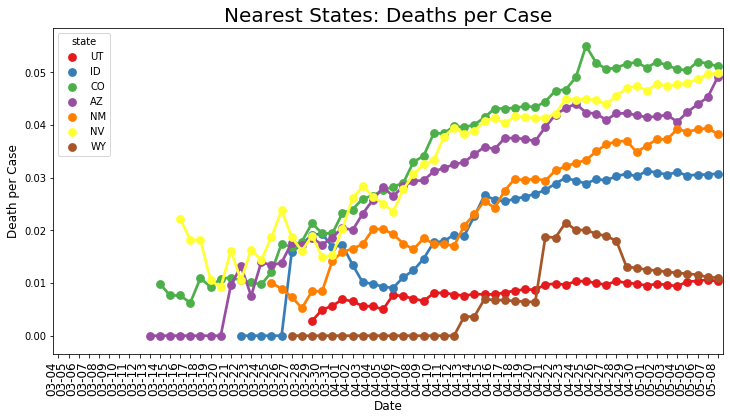

In [15]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'DperP',hue='state', data = FourC, palette = 'Set1')

x_dates = FourC['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('Nearest States: Deaths per Case', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Death per Case', fontdict={'fontsize':12})

#plt.savefig('4C + ID & NV Deaths per Case.png')
plt.show()

In [16]:
simCase = UT.append(df[df['state']=='KY']).append(df[df['state']=='NV']).append(df[df['state']=='OK'])

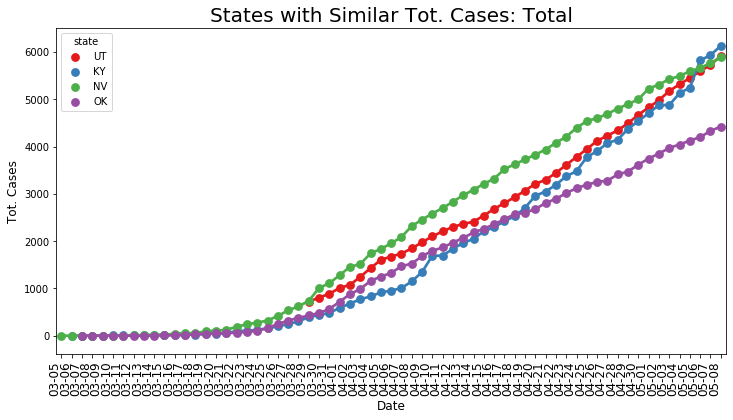

In [17]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'positive',hue='state', data = simCase, palette = 'Set1')

x_dates = simCase['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States with Similar Tot. Cases: Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})

#plt.savefig('Similar Cases Totals.png')
plt.show()

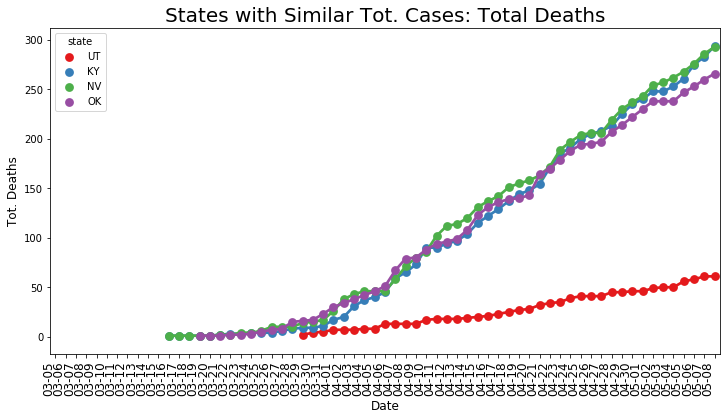

In [18]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'death',hue='state', data = simCase, palette = 'Set1')

x_dates = simCase['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States with Similar Tot. Cases: Total Deaths', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Deaths', fontdict={'fontsize':12})

#plt.savefig('Similar Cases Death.png')
plt.show()

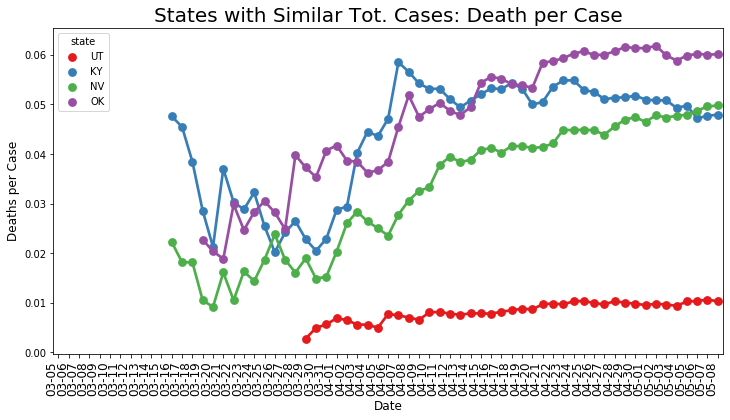

In [19]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'DperP',hue='state', data = simCase, palette = 'Set1')

x_dates = simCase['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States with Similar Tot. Cases: Death per Case', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Deaths per Case', fontdict={'fontsize':12})

#plt.savefig('Similar Cases tot. Deaths per Case.png')
plt.show()

In [20]:
df_1= df[df['state']=='WA'].append(df[df['state']=='GA']).append(df[df['state']=='MI'])


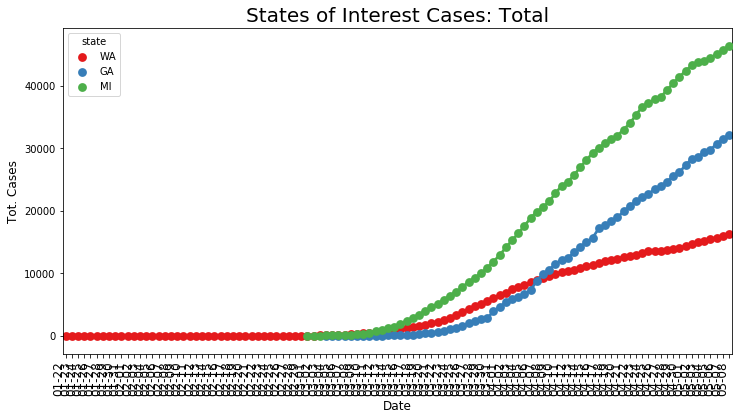

In [21]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.pointplot(x = 'date', y = 'positive',hue='state', data = df_1, palette = 'Set1')
x_dates = df_1['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States of Interest Cases: Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Tot. Cases', fontdict={'fontsize':12})


#plt.savefig('States of Interest Cases Totals.png')
plt.show()

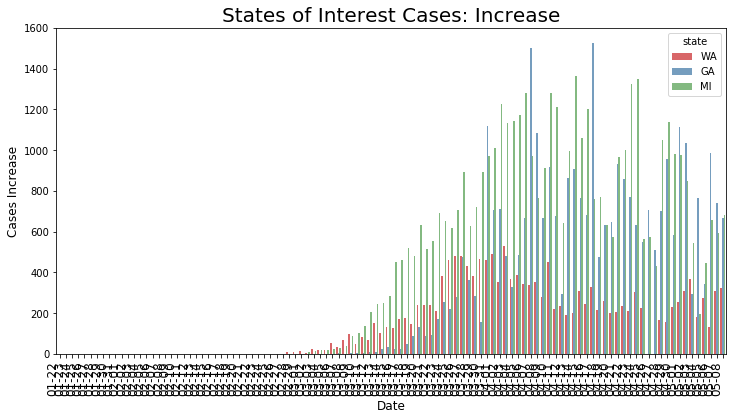

In [22]:
fig, ax = plt.subplots(figsize = (12,6))    

fig = sns.barplot(x = 'date', y = 'positiveIncrease',hue='state', data = df_1, palette = 'Set1',alpha=.75)
x_dates = df_1['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States of Interest Cases: Increase', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Cases Increase', fontdict={'fontsize':12})

#plt.savefig('States of Interest Cases Increase.png')
plt.show()

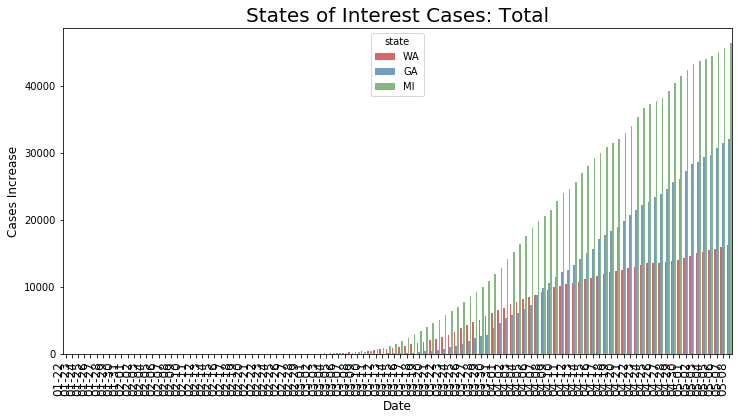

In [23]:
fig, ax = plt.subplots(figsize = (12,6))    

fig = sns.barplot(x = 'date', y = 'positive',hue='state', data = df_1, palette = 'Set1',alpha=.75)
x_dates = df_1['date'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right',fontdict={'fontsize':12})
plt.title('States of Interest Cases: Total', fontdict={'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Cases Increase', fontdict={'fontsize':12})


#plt.savefig('States of Interest Cases Increase.png')
plt.show()